# K-means Algorithm


Data clustering is one of the main mathematical applications variety of algorithms have been developed to tackle the problem. K-means is one of the basic algorithms for data clustering.

## Prerequisites

The reader should be familiar with basic linear algebra. 
 
## Competences 

The reader should be able to recognise applications where K-means algorithm can be efficiently used and use it.

_Credits._ The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

## Definitions

_Data clustering problem_ is the following: partition the given set of $m$ objects of the same type into $k$ subsets according to some criterion. Additional request may be to find the optimal $k$.

_K-means clustering problem_ is the following: 
partition the set  $X=\{x_{1},x_{2},\cdots ,x_{m}\}$ , where $x_{i}\in\mathbb{R}^{n}$, into $k$ _clusters_ $\pi=\{C_{1},C_{2},...,C_{k}\}$ such that
$$
J(\pi)=\sum_{i=1}^{k}\sum_{x\in
C_{i}}\| x-c_{i}\|_{2}^{2} \to \min
$$
over all possible partitions. Here
$c_{i}=\displaystyle\frac{1}{|C_{i}|}\sum_{x\in C_{i}} x$ is the mean of points in $C_i$ and $|C_i|$ is the cardinality of $C_i$.

_K-means clustering algorithm_ is the following:
1. _Initialization_: Choose initial set of $k$ means $\{c_1,\ldots,c_k\}$ (for example, by choosing randomly $k$ points from $X$).
2. _Assignment step_: Assign each point $x$ to one nearest mean $c_i$.
3. _Update step_: Compute the new means.
4. _Convergence_: Repeat Steps 2 and 3 until the assignment no longer changes.

A _first variation_ of a partition $\pi=\{C_1,\ldots,C_k\}$ is 
a partition $\pi^{\prime}=\{C_{1}^{\prime},\cdots ,C_{k}^{\prime }\}$ 
obtained by moving a single point $x$ from a cluster  $C_{i}$ to a cluster $C_{j}$. Notice that $\pi$ is a first variation of itself.

A _next partition_ of the partition $\pi$ is a partition 
$next(\pi)=\mathop{\mathrm{arg min}}\limits_{\pi^{\prime}} J(\pi^{\prime})$.

_First Variation clustering algorithm_ is the following:
1. Choose initial partition $\pi$.
2. Compute $next(\pi)$
3. If $J(next(\pi))<J(\pi)$, set $\pi=next(\pi)$ and go to Step 2
4. Stop.

## Facts

1. The k-means clustering problem is NP-hard.

2. In the k-means algorithm, $J(\pi)$ decreases in every iteration.

3. K-means algorithm can converge to a local minimum.

4. Each iteration of the k-means algorithm requires $O(mnk)$ operations.

4. K-means algorithm is implemented in the function `kmeans()` in the package [Clustering.jl](https://github.com/JuliaStats/Clustering.jl).

5. $J(\pi)=\mathop{\mathrm{trace}}(S_W)$, where
$$
S_{W}=\sum\limits_{i=1}^k\sum\limits_{x\in C_{i}}
(x-c_i)(x-c_{i})^{T}
=\sum_{i=1}^k\frac{1}{2|C_{i}|}\sum_{x\in C_{i}}\sum_{y \in C_{i}}
(x-y)(x-y)^{T}.
$$
Let $c$ denote the mean of $X$. Then $S_W=S_T-S_B$, where
\begin{align*}
S_{T}&=\sum_{x\in X}(x-c)(x-c)^{T} = 
\frac{1}{2m}\sum_{i=1}^m\sum_{j=1}^m
(x_{i}-x_{j})(x_{i}-x_{j})^{T}, \\
S_{B}&=\sum_{i=1}^k|C_{i}|(c_{i}-c)(c_{i}-c)^{T} =
\frac{1}{2m}\sum_{i=1}^k\sum_{j=1}^k|C_{i}||C_{j}|
(c_{i}-c_{j})(c_{i}-c_{j})^{T}.
\end{align*}

6. In order to try to avoid convergence to local minima, the k-means algorithm can be enhanced with first variation by adding the following steps:
    1. Compute $next(\pi)$. 
    2. If $J(next(\pi))<J(\pi)$, set $\pi=next(\pi)$ and go to Step 2.
     

In [1]:
using LinearAlgebra
using Random
using Statistics
function myKmeans(X::Array{T}, k::Int64) where T
    # X is Array of Arrays
    m,n=length(X),length(X[1])
    C=Array{Int64}(undef,m)
    # Choose random k means among X
    c=X[randperm(m)[1:k]]
    # This is just to start the while loop
    cnew=copy(c)
    cnew[1]=cnew[1]+[1.0;1.0]
    # Loop
    iterations=0
    while cnew!=c
        iterations+=1
        cnew=copy(c)
        # Assignment
        for i=1:m
            C[i]=findmin([norm(X[i]-c[j]) for j=1:k])[2]
        end
        # Update
        for j=1:k
            c[j]=mean(X[C.==j])
        end
    end
    C,c,iterations
end

myKmeans (generic function with 1 method)

### Example - Random clusters

We generate $k$ random clusters around points with integer coordinates.

In [2]:
using Plots

In [3]:
# Generate points 
k=5
centers=rand(-5:5,k,2)
# Number of points in cluster
sizes=rand(10:50,k)
# X is array of arrays
X=Array{Array{Any}}(undef,sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    for i=first:last
        X[i]=map(Float64,vec(centers[j,:])+(rand(2) .-0.5)/2)
    end
end
centers, sizes

([4 -1; -3 -3; … ; -4 3; 4 0], [39, 26, 33, 45, 36])

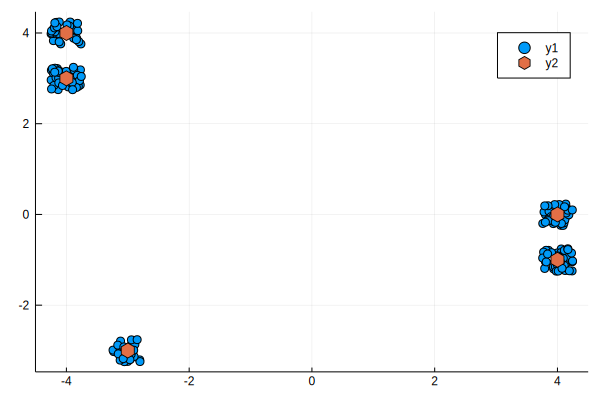

In [4]:
# Prepare for plot
function extractxy(X::Array)
    x=[X[i][1] for i=1:length(X)]
    y=[X[i][2] for i=1:length(X)]
    x,y
end
x,y=extractxy(X)
scatter(x,y)
scatter!(centers[:,1],centers[:,2],markershape = :hexagon, markersize = 7)

In [5]:
# Plot the solution
function plotKmeansresult(C::Array,c::Array,X::Array)
    scatter()
    # Clusters
    x,y=extractxy(X)
    for j=1:k
        scatter!(x[findall(C.==j)],y[findall(C.==j)])
    end
    # Means
    cx,cy=extractxy(c)
    scatter!(cx,cy,markershape=:hexagon,markersize=7,color=:red)
end

plotKmeansresult (generic function with 1 method)

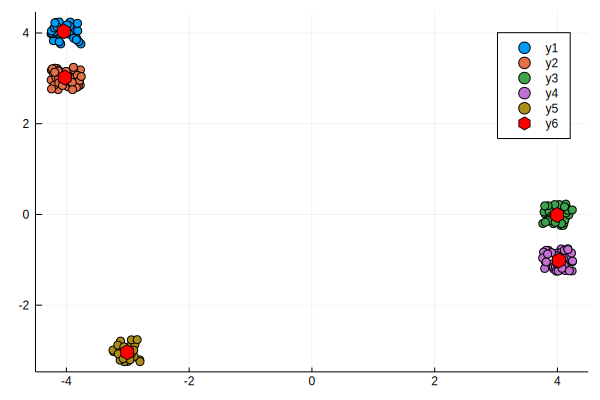

In [7]:
# Cluster the data, repeat several times
C,c,iterations=myKmeans(X,k)
plotKmeansresult(C,c,X)

__What happens?__

We see that the algorithm, although simple, for this example 
converges to a local minimum.

Let us try the function `kmeans()` from the package `Clustering.jl`.
In this function, the inpout is a matrix where columns are points, number of cluster we are looking for, and, optionally, the method to compute initial means. 

If we choose `init=:rand`, the results are similar. If we choose
`init=:kmpp`, wjich is the default, the results are better, but convergence to a local minimum is still possible.

_Run the clustering several times!_

```
seeding_algorithm(s::Symbol) = 
    s == :rand ? RandSeedAlg() :
    s == :kmpp ? KmppAlg() :
    s == :kmcen ? KmCentralityAlg() :
    error("Unknown seeding algorithm $s")
```

In [8]:
using Clustering

┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.1/Clustering/Ovl2Q.ji for Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1184


In [9]:
methods(kmeans)

# 1 method for generic function "kmeans":
[1] kmeans(X::AbstractArray{#s30,2} where #s30<:Real, k::Integer; weights, init, maxiter, tol, display, distance) in Clustering at /home/slap/.julia/packages/Clustering/Dlx92/src/kmeans.jl:94

In [10]:
X1=Matrix(transpose([x y]))
out=kmeans(X1,k,init=:kmpp)

KmeansResult{Array{Float64,2},Float64,Int64}([-4.04412 4.02301 … -4.02641 -3.00935; 4.03569 -1.01663 … 3.01699 -3.03832], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0.0667773, 0.0123485, 0.0793632, 0.0287382, 0.052069, 0.0297368, 0.0411742, 0.027751, 0.0945903, 0.0485154  …  0.00598299, 0.0231562, 0.0363496, 0.0398456, 0.0413349, 0.0471315, 0.0618063, 0.0270031, 0.0732931, 0.081306], [33, 39, 36, 45, 26], [33, 39, 36, 45, 26], 7.854824961703148, 3, true)

In [11]:
fieldnames(KmeansResult)

(:centers, :assignments, :costs, :counts, :wcounts, :totalcost, :iterations, :converged)

In [12]:
out.centers

2×5 Array{Float64,2}:
 -4.04412   4.02301   3.99496    -4.02641  -3.00935
  4.03569  -1.01663  -0.0124262   3.01699  -3.03832

In [13]:
println(out.assignments)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [14]:
# We need to modify the plotting function
function plotKmeansresult(out::KmeansResult,X::Array)
    k=size(out.centers,2)
    scatter()
    # Clusters
    for j=1:k
        scatter!(X[1,findall(out.assignments.==j)],X[2,findall(out.assignments.==j)])
    end
    # Means
    scatter!(out.centers[1,:],out.centers[2,:],markershape=:hexagon,markersize=7,color=:red)   
end

plotKmeansresult (generic function with 2 methods)

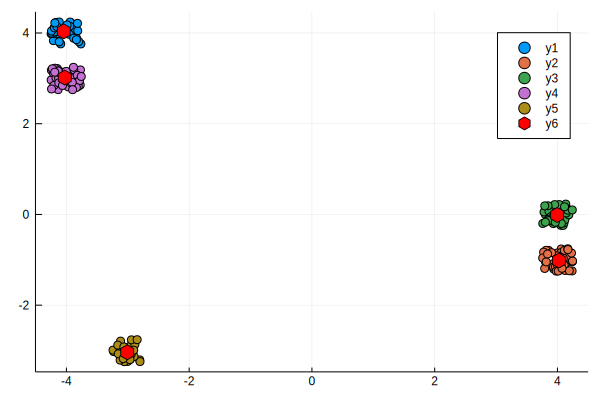

In [15]:
plotKmeansresult(out,X1)

### Example - Concentric rings

The k-means algorithm works well if clusters can be separated by hyperplanes. In this example it is not the case.

In [16]:
# Number of rings, try also k=3
k=2
# Center
center=[rand(-5:5);rand(-5:5)]
# Radii
radii=randperm(10)[1:k]
# Number of points in circles
sizes=rand(1000:2000,k)
center,radii,sizes

([1, 5], [7, 9], [1748, 1777])

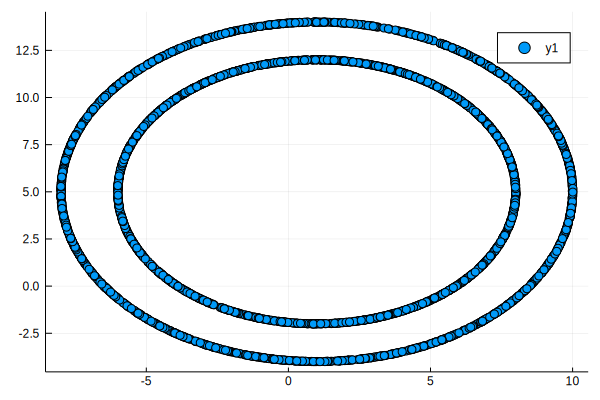

In [17]:
# Points
X=Array{Float64}(undef,2,sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2).-0.5)/50
    end
end
scatter(X[1,:],X[2,:])

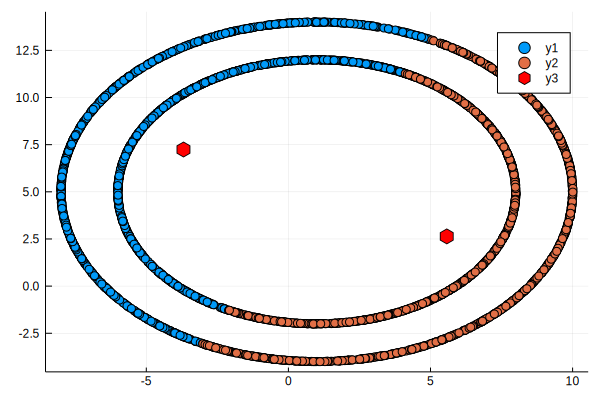

In [18]:
out=kmeans(X,k)
plotKmeansresult(out,X)